<a href="https://colab.research.google.com/github/ramya-972/python/blob/main/image_classification_using_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ipython-autotime
%load_ext autotime

time: 156 µs (started: 2021-02-20 03:17:28 +00:00)


In [ ]:
!pip install bing-image-downloader 

In [ ]:
!mkdir images

In [ ]:
from bing_image_downloader import downloader
downloader.download("bikes",limit=11,output_dir='images',adult_filter_off=True)





[!!]Indexing page: 1

[%] Indexed 11 Images on Page 1.


[%] Downloading Image #1 from http://lenzsport.com/wp-content/uploads/2018/06/Lenz-special-deal-bikes-2018-10.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://www.bigw.com.au/medias/sys_master/images/images/h41/h99/15364812701726.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://cdn.shopify.com/s/files/1/0777/4197/files/1200x750-Page-Image-Custom-Builds.jpg?v=1479913058
[Error]Invalid image, not saving https://cdn.shopify.com/s/files/1/0777/4197/files/1200x750-Page-Image-Custom-Builds.jpg?v=1479913058

[!] Issue getting: https://cdn.shopify.com/s/files/1/0777/4197/files/1200x750-Page-Image-Custom-Builds.jpg?v=1479913058
[!] Error:: No active exception to reraise
[%] Downloading Image #3 from https://www.thebikelist.co.uk/images/models/NS Bikes/2014/metropolis-2-jump-bike/00prod108930_Grey_NE_02.jpg
[!] Issue getting: https://www.thebikelist.co.uk/images/models/NS Bikes/2014/metropolis-2-jump-bike/

In [ ]:
from bing_image_downloader import downloader
downloader.download("cars",limit=11,output_dir='images',adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 11 Images on Page 1.


[%] Downloading Image #1 from http://s1.cdn.autoevolution.com/images/news/gallery/consumer-reports-best-worst-cars-2016_8.jpeg
[%] File Downloaded !

[%] Downloading Image #2 from https://s1.cdn.autoevolution.com/images/news/gallery/production-cars-with-the-highest-torque-numbers-for-2017_34.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://cdn.motor1.com/images/mgl/rPXnr/s1/best-cars-lead.jpg
[Error]Invalid image, not saving https://cdn.motor1.com/images/mgl/rPXnr/s1/best-cars-lead.jpg

[!] Issue getting: https://cdn.motor1.com/images/mgl/rPXnr/s1/best-cars-lead.jpg
[!] Error:: No active exception to reraise
[%] Downloading Image #3 from https://cdn.motor1.com/images/mgl/mrz1e/s3/coolest-cars-feature.jpg
[Error]Invalid image, not saving https://cdn.motor1.com/images/mgl/mrz1e/s3/coolest-cars-feature.jpg

[!] Issue getting: https://cdn.motor1.com/images/mgl/mrz1e/s3/coolest-cars-feature.jpg
[!] Error:: No active 

In [ ]:
import numpy as np
 
a = np.array([[1,2,3,4,5],
             [4,5,6,7,8]])
a.ndim

2

time: 7.07 ms (started: 2021-02-20 03:17:38 +00:00)


In [ ]:
a.flatten()



array([1, 2, 3, 4, 5, 4, 5, 6, 7, 8])

time: 4.11 ms (started: 2021-02-20 03:17:43 +00:00)


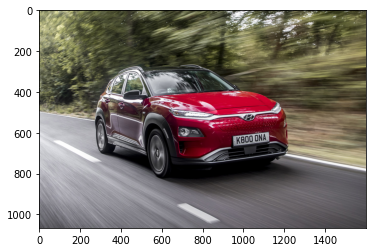

time: 25.8 s (started: 2021-02-20 03:18:18 +00:00)


In [ ]:
#preprocessing
# resize
# flatten

import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []

DATADIR = '/content/images'
CATEGORIES = ['bikes','cars']


for category in CATEGORIES:
  class_num = CATEGORIES.index(category) #label encoding the values
  path = os.path.join(DATADIR,category) # create path to use all the images
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    #print(img_array.shape)
    plt.imshow(img_array)
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data) 
target = np.array(target)
images = np.array(images)   


In [ ]:
len(flat_data[0])

67500

time: 4.39 ms (started: 2021-02-20 03:21:24 +00:00)


In [ ]:
150*150*3

67500

time: 2.76 ms (started: 2021-02-20 03:21:30 +00:00)


In [ ]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

time: 5.08 ms (started: 2021-02-20 03:21:35 +00:00)


<BarContainer object of 2 artists>

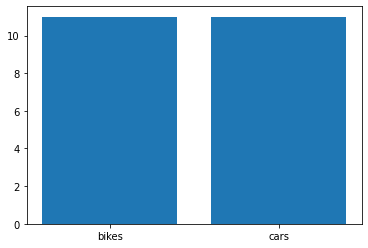

time: 153 ms (started: 2021-02-20 03:21:39 +00:00)


In [ ]:
unique,count = np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

In [ ]:
# split into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,
                                  test_size=0.3,random_state=209)

time: 13.6 ms (started: 2021-02-20 03:22:00 +00:00)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000],'kernel':['rbf']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf'],
              }
]



svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 5.95 s (started: 2021-02-20 03:50:38 +00:00)


In [ ]:
y_pred = clf.predict(x_test)
y_pred

array([0, 0, 0, 1, 1, 0, 1])

time: 18.4 ms (started: 2021-02-20 03:53:44 +00:00)


In [ ]:
y_test

array([0, 0, 1, 1, 1, 0, 1])

time: 5.95 ms (started: 2021-02-20 03:53:55 +00:00)


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

time: 926 µs (started: 2021-02-20 03:55:50 +00:00)


In [ ]:
accuracy_score(y_pred,y_test)

0.8571428571428571

time: 3.49 ms (started: 2021-02-20 03:56:20 +00:00)


In [ ]:
confusion_matrix(y_pred,y_test)

array([[3, 1],
       [0, 3]])

time: 12.8 ms (started: 2021-02-20 04:13:10 +00:00)


In [ ]:
# save the model using pickle library
import pickle
pickle.dump(clf,open('img_model.p','wb'))

time: 21.1 ms (started: 2021-02-20 04:08:13 +00:00)


In [ ]:
model = pickle.load(open('img_model.p','rb'))

time: 10.6 ms (started: 2021-02-20 04:08:22 +00:00)


Enter your URLhttps://www.extremetech.com/wp-content/uploads/2019/12/SONATA-hero-option1-764A5360-edit.jpg
(743, 1344, 3)
 PREDICTED OUTPUT: bikes


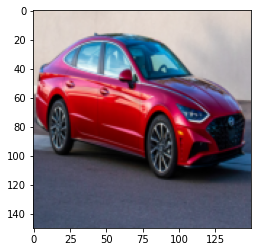

time: 39.5 s (started: 2021-02-20 04:08:29 +00:00)


In [ ]:
# testing a brand new image


flat_data = []
url = input('Enter your URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f' PREDICTED OUTPUT: {y_out}')
